In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers


In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:

REG=0.0
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(REG), input_shape=(32, 32, 3)))
model.add(layers.Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.Conv2D(1024, (3, 3),kernel_regularizer=regularizers.l2(REG), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 512)       2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 1024)      4719616   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 1024)      9438208   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 1024)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)            

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint


checkpoint = ModelCheckpoint(
    '/content/cipher_decay0.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
    
)


In [22]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 206s 5ms/step - loss: 1.5790 - acc: 0.4287 - val_loss: 1.3495 - val_acc: 0.5183
Epoch 2/25
40000/40000 [==============================] - 205s 5ms/step - loss: 1.0772 - acc: 0.6250 - val_loss: 0.8980 - val_acc: 0.6895
Epoch 3/25
40000/40000 [==============================] - 206s 5ms/step - loss: 0.8184 - acc: 0.7185 - val_loss: 0.9160 - val_acc: 0.6866
Epoch 4/25
40000/40000 [==============================] - 206s 5ms/step - loss: 0.6454 - acc: 0.7774 - val_loss: 0.6846 - val_acc: 0.7631
Epoch 5/25
40000/40000 [==============================] - 206s 5ms/step - loss: 0.5040 - acc: 0.8254 - val_loss: 0.6781 - val_acc: 0.7702
Epoch 6/25
40000/40000 [==============================] - 206s 5ms/step - loss: 0.3755 - acc: 0.8717 - val_loss: 0.6871 - val_acc: 0.7891
Epoch 7/25
40000/40000 [==============================] - 205s 5ms/step - loss: 0.2602 - acc: 0.9109 - val_loss: 0.6933 - 

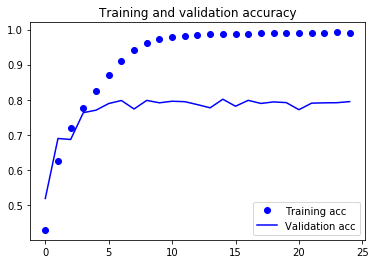

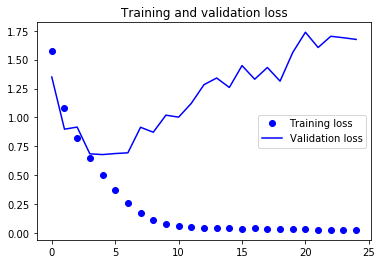

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
 model = keras.models.load_model('/content/cipher_decay0.h5')


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 19s 2ms/step


In [26]:
test_acc

0.7893

In [27]:
test_loss

1.3703094530582427

In [28]:

import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal

array([3, 8, 8, ..., 5, 1, 7])

In [29]:

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal


array([3, 8, 8, ..., 5, 1, 7])

In [30]:
print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.85      0.91      0.88      1000
           2       0.76      0.69      0.72      1000
           3       0.61      0.61      0.61      1000
           4       0.76      0.78      0.77      1000
           5       0.69      0.71      0.70      1000
           6       0.87      0.82      0.84      1000
           7       0.83      0.84      0.84      1000
           8       0.88      0.85      0.87      1000
           9       0.82      0.86      0.84      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [31]:
print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[818  20  30  19  19   5   6   4  45  34]
 [  5 909   0   4   2   4   5   0  12  59]
 [ 57   6 687  51  67  59  29  22  11  11]
 [ 21  11  51 612  47 156  42  29   9  22]
 [  8   4  42  49 777  26  24  56   8   6]
 [  6   5  36 151  32 706   8  43   4   9]
 [  5   3  31  63  28  23 822   9   9   7]
 [  6   1  20  31  44  37   3 845   1  12]
 [ 47  35   9  11   4   6   4   7 852  25]
 [ 17  73   3  12   1   4   3   6  16 865]]
